In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [5]:
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model using automap_base()
Base = automap_base()
# reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

# Assign the station class to a variable called `Station`
Station = Base.classes.station

In [9]:
# Create our Session() and bind it to the engine
session = Session(engine)

In [10]:
measurement_row = session.query(Measurement).first()
measurement_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d1ceb7a948>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
# Use the session to query Measurement table and display the first 15 records
for row in session.query(Measurement.id,Measurement.date, Measurement.tobs, Measurement.prcp).limit(15).all():
    print(row)

(1, '2010-01-01', 65.0, 0.08)
(2, '2010-01-02', 63.0, 0.0)
(3, '2010-01-03', 74.0, 0.0)
(4, '2010-01-04', 76.0, 0.0)
(5, '2010-01-06', 73.0, None)
(6, '2010-01-07', 70.0, 0.06)
(7, '2010-01-08', 64.0, 0.0)
(8, '2010-01-09', 68.0, 0.0)
(9, '2010-01-10', 73.0, 0.0)
(10, '2010-01-11', 64.0, 0.01)
(11, '2010-01-12', 61.0, 0.0)
(12, '2010-01-14', 66.0, 0.0)
(13, '2010-01-15', 65.0, 0.0)
(14, '2010-01-16', 68.0, 0.0)
(15, '2010-01-17', 64.0, 0.0)


In [12]:
station_row = session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d1ceb43108>,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

In [13]:
# Use the session to query Station table and display the first 15 records
for station_row in session.query(Station.id, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(15).all():
    print(station_row)

(1, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data

In [14]:
# Calculate the date 1 year ago from the last data point in the database
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
one_yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [15]:
# Calculate the date 1 year ago from the last data point in the database
max_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
max_date

('2017-08-23')

In [16]:
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [17]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results
prev_yr_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= prev_year).all()

In [18]:
# Save the query results as a Pandas DataFrame(), set the index to the date column and sort df by date
py_prcp_df = pd.DataFrame(prev_yr_prcp).set_index('date').sort_index(ascending=False)
py_prcp_df

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


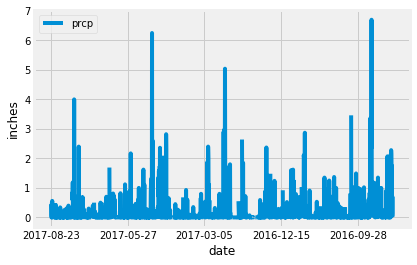

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
py_prcp_df.plot()
plt.ylabel('inches')

plt.savefig("images/precipitation.png")
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
py_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##### Design a query to show how many stations are available in this dataset


In [21]:
session.query(Station).distinct().count()

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. Hint: session.query() the station column in the Station table
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
most_act_stn = active_stations[0][0]
aggregates = func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)
session.query(*aggregates).filter(Measurement.station == most_act_stn ).all()

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_tobs_stn = pd.DataFrame(session.query(Measurement.date,Measurement.tobs).\
             filter(Measurement.date >= prev_year).\
             filter(Measurement.station == most_act_stn).\
                            order_by(Measurement.date).all())
max_tobs_stn

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


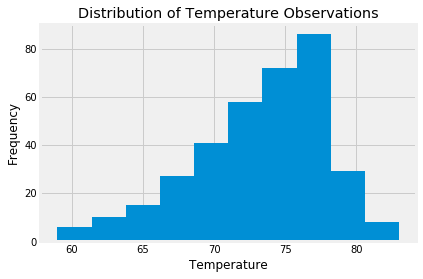

In [25]:
max_tobs_stn.hist()
plt.title("Distribution of Temperature Observations")
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Save image as png 
plt.savefig("images/tobs_hist.png")
plt.show()

## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    aggregates = func.min(Measurement.tobs), func.avg(Measurement.tobs),func.max(Measurement.tobs)
    
    return (session.query(*aggregates)
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = dt.date(2017, 2 ,1)
trip_end = dt.date(2017, 2 ,15)
print(calc_temps(trip_start, trip_end))
trip_temps = calc_temps(trip_start, trip_end)

[(59.0, 69.72448979591837, 80.0)]


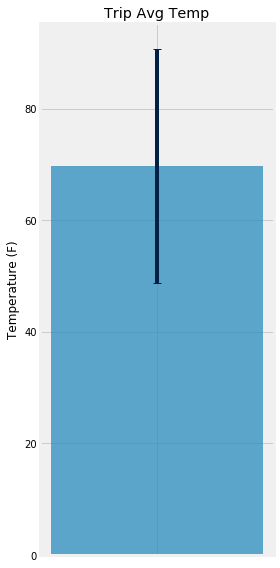

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=(4,8))
xpos = [1]

trip_avgtemp = [x[1] for x in trip_temps]
trip_maxtemp =  [x[2] for x in trip_temps]
trip_mintemp = [x[0] for x in trip_temps]
error = trip_maxtemp[0] - trip_mintemp[0]

ax.bar(xpos, trip_avgtemp, yerr=[error], align='center', alpha=0.75, color='#2b8cbe', capsize=4, ecolor="#002145")
ax.set_ylabel('Temperature (F)')
ax.set_xticks(xpos, [])
plt.tick_params(
    axis='x',          
    labelbottom=False
)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('./Images/trip_avgtemp.png')
plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_info = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
amount_rainfall = session.query(*rain_info).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= trip_start).\
    filter(Measurement.date <= trip_end).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
    
rainfall_bystation_df = pd.DataFrame(amount_rainfall, columns=["Station", "Station Name", "Latitude", "Longitude", "Elevation", "Total Precipitation"])

rainfall_bystation_df

,Station,Station Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,7.31
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.91
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,6.23
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,5.24
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.43
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,3.45
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
